# Physics-Informed Neural Networks

## Allan Peter Engsig-Karup (apek@dtu.dk)
## February 19, 2021

In [9]:
import tensorflow as tf
#print(packagename.__version__)
print(tf.__version__)
import keras as k
print(k.__version__)
import sciann as sn
print(sn.__version__)
import numpy as np
print(np.__version__)
import sympy as sym
print(sym.__version__)
from sciann import Variable, Functional, SciModel, Data

2.3.1
2.4.3
0.5.1
1.18.5
1.4


In [15]:
import notebook as nb
print(nb.__version__)

6.0.1


In [13]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__ 
list(imports())

['builtins',
 'builtins',
 'tensorflow',
 'keras',
 'sciann',
 'numpy',
 'sympy',
 'types',
 'pip']

We consider in the following the use of Physics-Informed Neural Networks(PINNs) for the construction of a surrogate model for the solution to the linear advection equation in one space dimension.
$u_{t}+cu_{x}=0 \qquad  t ∈ \mathbb{R^+}, x ∈ \mathbb{R}$ 
This problem have analytical solutions in the form $u(x,t)=f(x-ct)$, and an initial condition of the form $u(x,0)=f(x)=\sin(\pi x)$ is assumed. For $c>0$, a boundary condition is imposed on the left boundary because the information is travelling from left to right in this case
$u(0,t)=f(-ct)=sin(-\pi ct)$

In [2]:
from numpy import pi
#from sn.utils.math import diff, sign, sin
t = sn.Variable ("t")
x = sn.Variable ("x")
u = sn.Functional ("u", [x, t ] , 5*[30] , "tanh")
pi=np.pi
xmin=0
xmax=2
tmin=0
tmax=4
c=1
nx=100
ny=100

epochs = 250

xlin = np.linspace(xmin,xmax, nx)  
tlin = np.linspace(tmin,tmax, ny)
x_mesh, t_mesh = np.meshgrid(xlin, tlin) 
u_mesh = np.sin(pi*x_mesh-pi*c*t_mesh) 

u_exact = sn.math.sin(x-pi*c*t)

# Loss function (objective function)
L = sn.math.diff(u, t, order=1) + c * sn.math.diff(u , x, order=1 ) #+S
TOL = 0.0001

# Constraints
IC = (1-sn.utils.math.sign(t - TOL)) * (u - sn.utils.math.sin(pi*x))
BC = (1-sn.utils.math.sign(x - TOL)) * (u - sn.math.sin(pi*(x*0+xmin-c*t)) )

optimizer = k.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

m = sn.SciModel(
    inputs = [x, t],
    targets = [L,IC,BC],
    loss_func = "mse",
    optimizer = optimizer)
m.train([x_mesh, t_mesh ],['zero','zero','zero'],
    batch_size = 256 , epochs = epochs)

Train on 10000 samples
Epoch 1/250
10000/10000 [==============================] - 0s 8us/sample - loss: 0.0832 - add_loss: 0.0124 - mul_4_loss: 0.0366 - mul_8_loss: 0.0322
Epoch 2/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0381 - add_loss: 5.7482e-04 - mul_4_loss: 0.0169 - mul_8_loss: 0.0197
Epoch 3/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0378 - add_loss: 9.2584e-04 - mul_4_loss: 0.0159 - mul_8_loss: 0.0201
Epoch 4/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0393 - add_loss: 0.0010 - mul_4_loss: 0.0166 - mul_8_loss: 0.0209
Epoch 5/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0401 - add_loss: 5.6891e-04 - mul_4_loss: 0.0168 - mul_8_loss: 0.0240
Epoch 6/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0374 - add_loss: 4.6959e-04 - mul_4_loss: 0.0133 - mul_8_loss: 0.0228
Epoch 7/250
10000/10000 [==============================] - 0s 7us/s

10000/10000 [==============================] - 0s 7us/sample - loss: 0.0011 - add_loss: 3.6708e-05 - mul_4_loss: 7.9843e-05 - mul_8_loss: 9.6781e-04
Epoch 107/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0012 - add_loss: 3.6529e-05 - mul_4_loss: 1.0820e-04 - mul_8_loss: 0.0015
Epoch 108/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0032 - add_loss: 9.9806e-05 - mul_4_loss: 9.4938e-04 - mul_8_loss: 0.0021
Epoch 109/250
10000/10000 [==============================] - 0s 6us/sample - loss: 0.0014 - add_loss: 1.0622e-04 - mul_4_loss: 3.3758e-04 - mul_8_loss: 9.1833e-04
Epoch 110/250
10000/10000 [==============================] - 0s 7us/sample - loss: 0.0010 - add_loss: 3.4022e-05 - mul_4_loss: 7.8921e-05 - mul_8_loss: 8.9881e-04
Epoch 111/250
10000/10000 [==============================] - 0s 8us/sample - loss: 0.0011 - add_loss: 4.7752e-05 - mul_4_loss: 1.3600e-04 - mul_8_loss: 8.5335e-04
Epoch 112/250
10000/10000 [=================

Epoch 156/250
10000/10000 [==============================] - 0s 7us/sample - loss: 9.2779e-04 - add_loss: 3.7702e-05 - mul_4_loss: 4.7334e-05 - mul_8_loss: 8.2154e-04
Epoch 157/250
10000/10000 [==============================] - 0s 7us/sample - loss: 7.4188e-04 - add_loss: 5.9378e-05 - mul_4_loss: 1.1796e-04 - mul_8_loss: 5.4882e-04
Epoch 158/250
10000/10000 [==============================] - 0s 7us/sample - loss: 3.9367e-04 - add_loss: 3.5108e-05 - mul_4_loss: 3.3747e-05 - mul_8_loss: 3.1594e-04
Epoch 159/250
10000/10000 [==============================] - 0s 8us/sample - loss: 2.7755e-04 - add_loss: 1.4391e-05 - mul_4_loss: 3.0929e-05 - mul_8_loss: 2.2586e-04
Epoch 160/250
10000/10000 [==============================] - 0s 7us/sample - loss: 2.3735e-04 - add_loss: 1.2601e-05 - mul_4_loss: 3.8755e-05 - mul_8_loss: 1.8071e-04
Epoch 161/250
10000/10000 [==============================] - 0s 7us/sample - loss: 3.0348e-04 - add_loss: 1.9456e-05 - mul_4_loss: 2.2422e-05 - mul_8_loss: 2.5470e-0

In [ ]:
%matplotlib inline

In [20]:
import matplotlib as plt
print(plt.__version__)
import mpl_toolkits as mpl
print(mpl.__version__)

3.1.3


AttributeError: module 'mpl_toolkits' has no attribute '__version__'

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#print(v.eval([x_mesh, t_mesh]))
#print(L)
u_pred1 = u.eval(m, [x_mesh, t_mesh]) #+u0.eval([x_mesh, t_mesh])

l2_err = np.sum(np.power((u_mesh-u_pred1),2))
l2_err_t0 = np.sum(np.power((u_mesh[0,:]-u_pred1[0,:]),2))
l2_err_tmax = np.sum(np.power((u_mesh[-1,:]-u_pred1[-1,:]),2))

print(f'L2 err, all timesteps: {l2_err}')
print(f'Avg-L2 err, all timesteps: {l2_err/u_pred1.size}')
print(f'L2 err, t=0: {l2_err_t0}')
print(f'L2 err, t={tmax}: {l2_err_tmax}')

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, u_mesh, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$u(x,t) (exact)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, u_pred1, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$NN(x,t)\simeq u(x,t) (prediction)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, np.abs(u_mesh - u_pred1), cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Error, $|u(x,t)-NN(x,t)|$')
plt.colorbar()

#plt.show()

L2 err, all timesteps: 28.22982731861652
Avg-L2 err, all timesteps: 0.002822982731861652
L2 err, t=0: 0.1866376110423196
L2 err, t=4: 0.4967596169161544



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
np.sum(np.power((u_mesh-u_pred1),2))

28.22982731861652

In [5]:
np.min(np.power((u_mesh-u_pred1),2))

6.42639030164708e-08

In [6]:
from numpy import pi
#from sn.utils.math import diff, sign, sin
t = sn.Variable ("t")
x = sn.Variable ("x")
v = sn.Functional ("v", [x, t ] , 10*[30] , "tanh")#number of layers is relevant somehow
pi=np.pi
xmin=0
xmax=2
tmin=0
tmax=4
c=1
nx=250
ny=250

epochs = 300

xlin = np.linspace(xmin,xmax, nx)  
tlin = np.linspace(tmin,tmax, ny)
x_mesh, t_mesh = np.meshgrid(xlin, tlin) 
u_mesh = np.sin(pi*x_mesh-pi*c*t_mesh) 
#plt.plot(x_data, u_data,'k')
#plt.xlabel('x')
#plt.ylabel('u(x,t)')

u_exact = sn.math.sin(x-pi*c*t)
#u0=x/2*sn.math.sin(pi*(2-c*t))+(1-x/2)*sn.math.sin(-pi*c*t) the boundaries are the same
u0=x*0+sn.math.sin(-pi*c*t)

#S=pi*c*x/2*sn.math.cos(pi*(2-c*t))+pi*c*(1-x/2)*sn.math.cos(-pi*c*t)-c/2*sn.math.sin(pi*(2-c*t))+c/2*sn.math.sin(-pi*c*t)
S=x*0-pi*sn.math.cos(pi*t)
L = sn.math.diff(v , t , order=1) + c * sn.math.diff(v , x, order=1 )+S
#L = sn.math.diff(u , t ) + u * sn.math.diff(u , x ) - (0.01/ pi ) * sn.math.diff(u , x , order=2)
#Using _f to distinguish the functionals from the actual analytical functions.
#L_f=sn.constraints.pde.PDE(L, name='L_f')
#L_f=Functional('L_f', [x,t], [10, 10, 10], activation='tanh')

TOL = 0.0001
C1 = (1-sn.utils.math.sign(t - TOL)) * (v- sn.utils.math.sin(pi*x))
C2 = (1-sn.utils.math.sign(x - TOL)) * (v)

m = sn . SciModel (
    inputs = [x , t ] ,
    targets = [L,C1,C2] ,
    loss_func = "mse",
    optimizer = "adam")
m. train ([x_mesh, t_mesh ],['zero','zero','zero'],
batch_size =256 , epochs = epochs)

#

Train on 62500 samples
Epoch 1/300
62500/62500 [==============================] - 1s 12us/sample - loss: 1.7913 - add_5_loss: 1.7590 - mul_17_loss: 0.0110 - mul_18_loss: 0.0150
Epoch 2/300
62500/62500 [==============================] - 1s 12us/sample - loss: 0.0255 - add_5_loss: 0.0104 - mul_17_loss: 0.0070 - mul_18_loss: 0.0081
Epoch 3/300
62500/62500 [==============================] - 1s 12us/sample - loss: 0.0256 - add_5_loss: 0.0107 - mul_17_loss: 0.0065 - mul_18_loss: 0.0084
Epoch 4/300
62500/62500 [==============================] - 1s 12us/sample - loss: 0.0248 - add_5_loss: 0.0101 - mul_17_loss: 0.0064 - mul_18_loss: 0.0089
Epoch 5/300
62500/62500 [==============================] - 1s 11us/sample - loss: 0.0226 - add_5_loss: 0.0079 - mul_17_loss: 0.0063 - mul_18_loss: 0.0082
Epoch 6/300
62500/62500 [==============================] - 1s 11us/sample - loss: 0.0208 - add_5_loss: 0.0061 - mul_17_loss: 0.0065 - mul_18_loss: 0.0082
Epoch 7/300
62500/62500 [============================

62500/62500 [==============================] - 1s 16us/sample - loss: 0.0059 - add_5_loss: 0.0027 - mul_17_loss: 3.6238e-04 - mul_18_loss: 0.0029
Epoch 105/300
62500/62500 [==============================] - 1s 15us/sample - loss: 0.0054 - add_5_loss: 0.0025 - mul_17_loss: 5.0649e-04 - mul_18_loss: 0.0024
Epoch 106/300
62500/62500 [==============================] - 1s 15us/sample - loss: 0.0053 - add_5_loss: 0.0028 - mul_17_loss: 3.6131e-04 - mul_18_loss: 0.0021
Epoch 107/300
62500/62500 [==============================] - 1s 15us/sample - loss: 0.0039 - add_5_loss: 0.0017 - mul_17_loss: 3.6649e-04 - mul_18_loss: 0.0018
Epoch 108/300
62500/62500 [==============================] - 1s 14us/sample - loss: 0.0052 - add_5_loss: 0.0034 - mul_17_loss: 4.1379e-04 - mul_18_loss: 0.0014
Epoch 109/300
62500/62500 [==============================] - 1s 14us/sample - loss: 0.0036 - add_5_loss: 0.0020 - mul_17_loss: 5.0220e-04 - mul_18_loss: 0.0011
Epoch 110/300
62500/62500 [===========================

62500/62500 [==============================] - 1s 11us/sample - loss: 4.2188e-04 - add_5_loss: 3.3902e-04 - mul_17_loss: 6.7431e-05 - mul_18_loss: 1.4719e-05
Epoch 201/300
62500/62500 [==============================] - 1s 11us/sample - loss: 4.1545e-04 - add_5_loss: 3.3406e-04 - mul_17_loss: 5.9689e-05 - mul_18_loss: 2.0410e-05
Epoch 202/300
62500/62500 [==============================] - 1s 13us/sample - loss: 2.1255e-04 - add_5_loss: 1.3395e-04 - mul_17_loss: 6.0464e-05 - mul_18_loss: 1.8157e-05
Epoch 203/300
62500/62500 [==============================] - 1s 13us/sample - loss: 4.6254e-04 - add_5_loss: 3.5150e-04 - mul_17_loss: 8.1848e-05 - mul_18_loss: 2.8497e-05
Epoch 204/300
62500/62500 [==============================] - 1s 12us/sample - loss: 3.2323e-04 - add_5_loss: 2.4587e-04 - mul_17_loss: 4.7800e-05 - mul_18_loss: 3.2687e-05
Epoch 205/300
62500/62500 [==============================] - 1s 12us/sample - loss: 3.4417e-04 - add_5_loss: 2.1822e-04 - mul_17_loss: 5.3073e-05 - mul_18

62500/62500 [==============================] - 1s 17us/sample - loss: 1.4045e-05 - add_5_loss: 7.5030e-06 - mul_17_loss: 4.2523e-06 - mul_18_loss: 2.2691e-06
Epoch 291/300
62500/62500 [==============================] - 1s 16us/sample - loss: 1.1868e-05 - add_5_loss: 6.5006e-06 - mul_17_loss: 3.2903e-06 - mul_18_loss: 2.0595e-06
Epoch 292/300
62500/62500 [==============================] - 1s 17us/sample - loss: 1.6096e-05 - add_5_loss: 8.6108e-06 - mul_17_loss: 4.0602e-06 - mul_18_loss: 3.4352e-06
Epoch 293/300
62500/62500 [==============================] - 1s 15us/sample - loss: 1.6437e-05 - add_5_loss: 8.9477e-06 - mul_17_loss: 4.7217e-06 - mul_18_loss: 2.7312e-06
Epoch 294/300
62500/62500 [==============================] - 1s 15us/sample - loss: 1.7933e-05 - add_5_loss: 1.0405e-05 - mul_17_loss: 4.4521e-06 - mul_18_loss: 3.0683e-06
Epoch 295/300
62500/62500 [==============================] - 1s 15us/sample - loss: 1.7121e-05 - add_5_loss: 9.8758e-06 - mul_17_loss: 3.6839e-06 - mul_18

[[ 0.01164889  0.03773832  0.06381488 ... -0.05162334 -0.0272634
  -0.00283217]
 [ 0.01000643  0.03605914  0.06214309 ... -0.04948211 -0.02532125
  -0.00106978]
 [ 0.00838327  0.03430867  0.06031108 ... -0.0471189  -0.02319551
   0.00083804]
 ...
 [ 0.01872611  0.03995061  0.06142688 ... -0.04771996 -0.02155805
   0.00455785]
 [ 0.02724743  0.04794264  0.06891847 ... -0.04981279 -0.0236187
   0.00257421]
 [ 0.0370605   0.05717945  0.07759976 ... -0.05165577 -0.02551627
   0.00066733]]


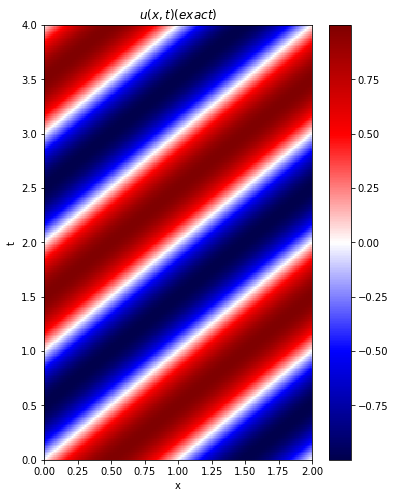

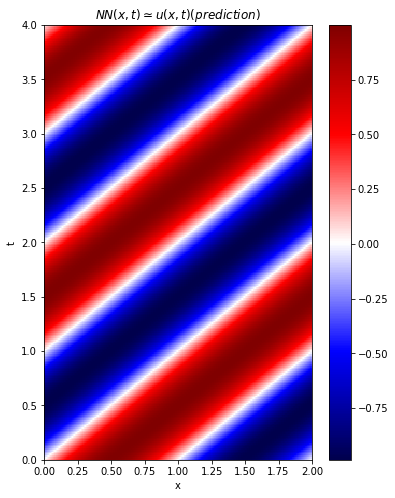

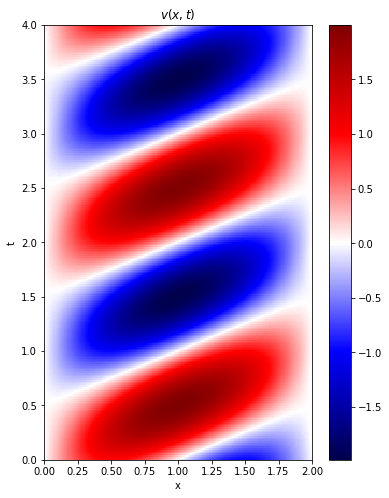

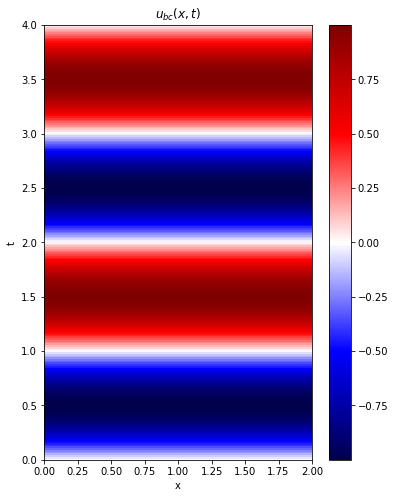

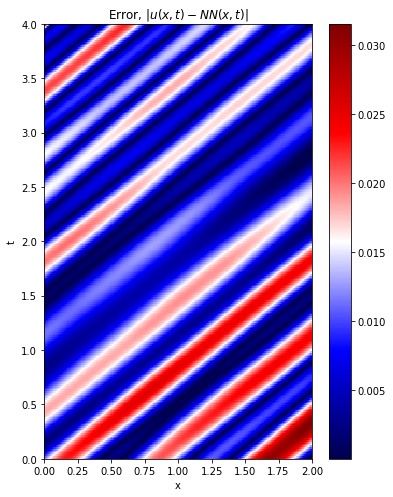

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
xlin = np.linspace(0,2, nx)  
tlin = np.linspace(tmin,4, ny)
x_mesh, t_mesh = np.meshgrid(xlin, tlin) 
print(v.eval([x_mesh, t_mesh]))
print(L)
u_pred1 = v.eval(m, [x_mesh, t_mesh])+u0.eval([x_mesh, t_mesh])

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, u_mesh, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$u(x,t) (exact)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, u_pred1, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$NN(x,t)\simeq u(x,t) (prediction)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, v.eval(m, [x_mesh, t_mesh]), cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$v(x,t)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, u0.eval( [x_mesh, t_mesh]), cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('$u_{bc}(x,t)$')
plt.colorbar()

fig = plt.figure(figsize=(6, 8))
plt.pcolor(x_mesh,t_mesh, np.abs(u_mesh - u_pred1), cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Error, $|u(x,t)-NN(x,t)|$')
plt.colorbar()